In [1]:
from math import sin, sqrt, exp, cos
import matplotlib.pyplot as plt
from rk4 import rk_error_control_perfect_first_step

In [2]:
def create_t_eval(start, end, num_points = 100):
    res = [start]
    h = (end - start)/(num_points - 1)

    for _ in range(num_points - 1):
        res.append(
            res[-1] + h
        )
    return res

In [3]:
def experiment(model, y0, t_span, solution):
    t_eval = create_t_eval(t_span[0], t_span[1])
    tol = 1e-6
    (res, sol, first_deriv, error_samplings, lower_sol, lower_error_samplings) = rk_error_control_perfect_first_step(model, t_span, y0[0], tol, solution)
    print("integration complete")

    # ====================================== figure of rk6 vs rk6_interps vs rk45
    # plt.figure()
    xs = [x[0] for x in res]
    # ys = [x[1] for x in res]
    # plt.plot(xs, ys, label="rk6")

    # plots of where the end of the steps occured to look at the interp
    # for this_x in xs:
    #     plt.axvline(x=this_x) 

    computed_solutions = [sol(x) for x in t_eval]
    lower_computed_solutions = [lower_sol.eval(x) for x in t_eval]
    # plt.plot(t_eval, computed_solutions, label="computed solution")

    actual_solutions = solution(t_eval)
    # plt.plot(t_eval, actual_solutions, label="actual solution")

    # removed rk45 plt.title("solution vs rk45 vs rk6 vs rk6_interpolated")
    # plt.title(f"actual solution vs interpolated solution tol={tol}")
    # plt.xlabel("t")
    # plt.ylabel('y')
    # plt.legend(loc="upper right")
    # plt.show()
    # ====================================== end figure of rk6 vs rk6_interps vs rk45

    # ====================================== global error
    plt.figure()
    error = [abs(computed_solution - actual_solution) for (computed_solution, actual_solution) in zip(computed_solutions, actual_solutions)]
    lower_error = [abs(lower_computed_solution - actual_solution) for (lower_computed_solution, actual_solution) in zip(lower_computed_solutions, actual_solutions)]
    # for this_x in xs:
    #     plt.axvline(x=this_x) 
    plt.plot(t_eval, error, label="higher_order")
    plt.plot(t_eval, lower_error, label="lower_order")
    # plt.title(f"global error for tol={tol}")
    plt.xlabel("t")
    plt.ylabel("error")
    plt.legend(loc="upper right")
    plt.show()
    # ====================================== end of global error

    # shape of errors - graphs
    plt.figure()
    for (x_i, x_i_plus_1, hb) in error_samplings:
        num_points = 100
        pts_to_sample = create_t_eval(x_i, x_i_plus_1, num_points)
        errors = []
        for i, pt in enumerate(pts_to_sample):
            y = solution([pt])[0]
            hb_eval = hb.eval(pt)
            error = abs(hb_eval - y)
            errors.append( error )

        maximum_error = max(errors)
        scaled_errors = [error / (maximum_error) for error in errors]

        # str_x_i = "{:.3f}".format(x_i)
        # str_x_i_plus_1 = "{:.3f}".format(x_i_plus_1)
        x_axis = [i/(num_points - 1) for i in range(num_points)]
        plt.plot(x_axis, scaled_errors, label=f"x_{str(x_i)}_{str(x_i_plus_1)}")
    plt.title("plot of shape of exact errors of HIGHER ORDER")
    plt.xlabel(r"$x_i$ to $x_{i+1}$")
    plt.ylabel('scaled exact errors')
    # plt.legend()
    plt.show()

    plt.figure()
    for (x_i, x_i_plus_1, hb) in lower_error_samplings:
        num_points = 100
        pts_to_sample = create_t_eval(x_i, x_i_plus_1, num_points)
        errors = []
        for i, pt in enumerate(pts_to_sample):
            y = solution([pt])[0]
            hb_eval = hb.eval(pt)
            error = abs(hb_eval - y)
            errors.append( error )

        maximum_error = max(errors)
        scaled_errors = [error / (maximum_error) for error in errors]

        # str_x_i = "{:.3f}".format(x_i)
        # str_x_i_plus_1 = "{:.3f}".format(x_i_plus_1)
        x_axis = [i/(num_points - 1) for i in range(num_points)]
        plt.plot(x_axis, scaled_errors, label=f"x_{str(x_i)}_{str(x_i_plus_1)}")
    plt.title("plot of shape of exact errors of LOWER ORDER")
    plt.xlabel(r"$x_i$ to $x_{i+1}$")
    plt.ylabel('scaled exact errors')
    # plt.legend()
    plt.show()

    plt.figure()
    for ((x_i, x_i_plus_1, lower_hb), (_, _, higher_hb)) in zip(lower_error_samplings, error_samplings):
        num_points = 100
        pts_to_sample = create_t_eval(x_i, x_i_plus_1, num_points)
        errors = []
        for i, pt in enumerate(pts_to_sample):
            lower_hb_eval  = lower_hb.eval(pt)
            higher_hb_eval = higher_hb.eval(pt)
            error = abs(lower_hb_eval - higher_hb_eval)
            errors.append( error )

        maximum_error = max(errors)
        scaled_errors = [error / (maximum_error) for error in errors]

        # str_x_i = "{:.3f}".format(x_i)
        # str_x_i_plus_1 = "{:.3f}".format(x_i_plus_1)
        x_axis = [i/(num_points - 1) for i in range(num_points)]
        plt.plot(x_axis, scaled_errors, label=f"x_{str(x_i)}_{str(x_i_plus_1)}")
    plt.title("plot of shape of ESTIMATED errors between interpolants")
    plt.xlabel(r"$x_i$ to $x_{i+1}$")
    plt.ylabel('scaled estimated errors')
    # plt.legend()
    plt.show()

    for (x, y) in res:
        print(abs(y - solution([ x ])[0]))



tolerance= 1e-06
alpha values [0.5, 1.0, 0.9999999999999997, 1.0000000000000002, 1.0000000000000007, 0.49999999999999967, 0.9999999999999987, 0.5000000000000007]
n_steps 37
n_successful_steps 35

integration complete
ERROR: 0 is outside of the solution range: 0.01 <= x <= 10.399999999999997 - evaluating the first interp
ERROR: 0 is outside of the solution range: 0.01 <= x <= 10.399999999999997 - evaluating the first interp


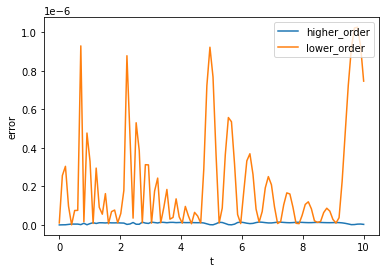

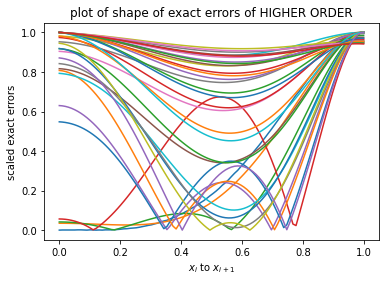

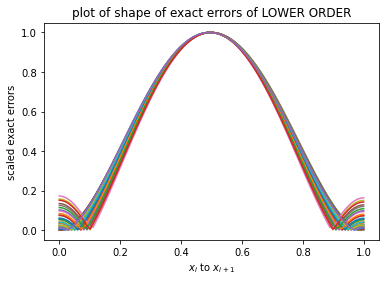

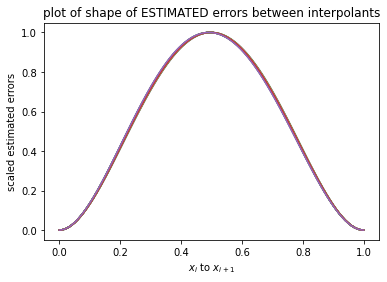

0.0
0.0
1.7030821197749901e-13
4.901523631417604e-12
1.1872092198217388e-10
2.1053596643838546e-09
3.3418889877623315e-09
4.0925234312538805e-09
4.525407826250216e-09
4.749143078797147e-09
4.8348399728226354e-09
4.8296284749227425e-09
8.815477126056237e-09
1.0913191350603313e-08
1.188687248632192e-08
1.2196654908258608e-08
1.211862965533328e-08
1.1819131229273694e-08
1.1398886168301203e-08
1.0919065096537395e-08
1.0416743800867323e-08
1.3134683674032033e-08
1.4303055406728049e-08
1.4578218077154759e-08
1.4355325594905821e-08
1.3866552184271796e-08
1.3247129060367513e-08
1.2575300967210268e-08
1.1895801010908258e-08
1.4122571001529138e-08
1.4941325010564555e-08
1.494535495361049e-08
1.451094155946464e-08
1.3859173808583591e-08
1.3115958208409495e-08
1.2351431322166206e-08
1.4179517449086632e-08


In [4]:
t_span_1 = [0, 10]
y0_1 = [1]

def model1(t, y):
    return [(-1/2) * y**3]

def solution1(t):
    return [1/sqrt(1+x) for x in t]

experiment(model1, y0_1, t_span_1, solution1)

tolerance= 1e-06
alpha values [0.5, 1.0, 0.9999999999999997, 1.0000000000000002, 0.5000000000000002, 1.0000000000000007, 1.9999999999999973, 0.5000000000000007, 0.9999999999999987, 0.49999999999999967]
n_steps 50
n_successful_steps 46

integration complete
ERROR: 0 is outside of the solution range: 0.01 <= x <= 10.52 - evaluating the first interp
ERROR: 0 is outside of the solution range: 0.01 <= x <= 10.52 - evaluating the first interp


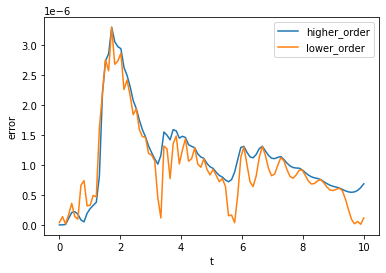

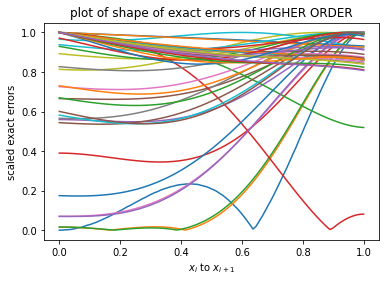

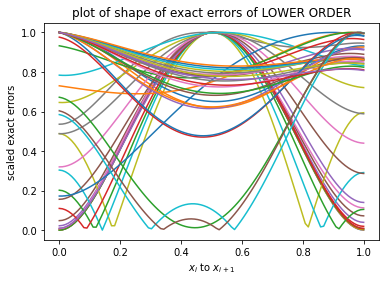

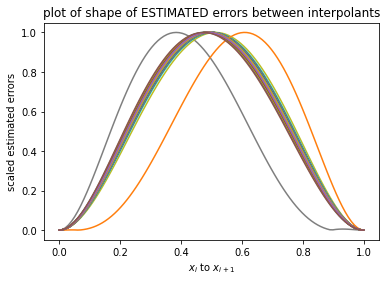

0.0
0.0
2.4991120284312274e-13
1.6223355991940025e-11
1.0332492639264501e-09
2.6518951479204134e-09
4.741393055951448e-09
7.125089074300206e-09
1.0228657043587219e-07
1.8056668882326932e-07
2.1972832020544786e-07
2.1064650401747542e-07
1.9624776792515064e-07
1.817129856584998e-07
9.434349634851458e-08
7.634065157802183e-09
1.0975093511778056e-07
2.015556398449192e-07
2.77064924225634e-07
3.3406862087748124e-07
3.730085644249037e-07
3.958890922861613e-07
2.2609303499399047e-06
3.0781430754855954e-06
3.2844321884994976e-06
3.1675450611057254e-06
2.9002885280904334e-06
2.579648408801427e-06
2.2565760466886076e-06
1.9555394885351074e-06
1.6864246899922497e-06
1.4514578859370353e-06
1.249102161191007e-06
1.076186326456896e-06
1.597647621587317e-06
1.6318094881312417e-06
1.4876036476055288e-06
1.293220139607365e-06
1.1001520050582525e-06
9.270739242672743e-07
7.787718140153665e-07
1.3290117556845338e-06
1.3039267031597634e-06
1.1244536012554318e-06
9.267261621218048e-07
7.514233971526313e-07

In [5]:
t_span_2 = [0, 10]
y0_2 = [1]

def model2(t, y):
    return [-2*t*y**2]

def solution2(t):
    return [1/(1+x**2) for x in t]

experiment(model2, y0_2, t_span_2, solution2)

tolerance= 1e-06
alpha values [0.5, 1.0, 0.9999999999999997, 1.0000000000000002, 1.0000000000000007, 1.9999999999999987, 0.5000000000000007]
n_steps 34
n_successful_steps 30

integration complete
ERROR: 0 is outside of the solution range: 0.01 <= x <= 10.240000000000006 - evaluating the first interp
ERROR: 0 is outside of the solution range: 0.01 <= x <= 10.240000000000006 - evaluating the first interp


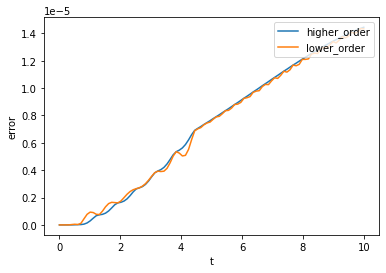

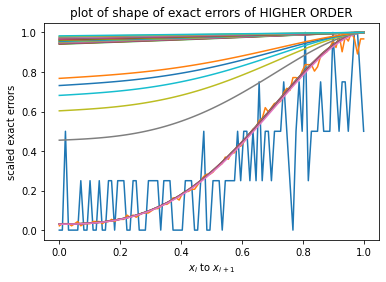

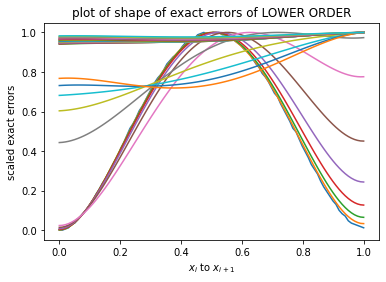

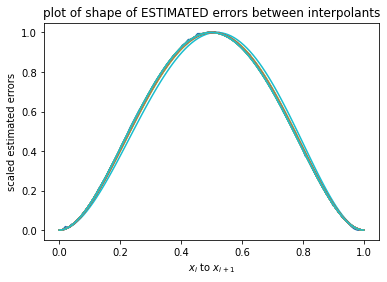

0.0
0.0
4.440892098500626e-16
1.9761969838327786e-14
6.368239269249898e-13
2.0509371978505442e-11
6.650360262483446e-10
2.1832756491591e-08
7.327120796762898e-07
1.6106822973149804e-06
2.6692584100818095e-06
3.916946036852664e-06
5.3551572101184775e-06
6.976115675794148e-06
7.415668943799858e-06
7.868223196538793e-06
8.332074316719229e-06
8.8052089481927e-06
9.28529903498898e-06
9.769702921325063e-06
1.0255474011344745e-05
1.0739377900748082e-05
1.1217918657102643e-05
1.1687374700919406e-05
1.2143844405620996e-05
1.2583301110424827e-05
1.3001656862243749e-05
1.3394833686675156e-05
1.3758840757382984e-05
1.4089855348231595e-05
1.438430510702915e-05
1.4638948860223877e-05


In [6]:
t_span_3 = [0, 10]
y0_3 = [1]

def model3(t, y):
    return [(1/4)*y*(1 - y/20)]

def solution3(t):
    return [20 / ( 1 + 19 * exp(-x/4) ) for x in t]

experiment(model3, y0_3, t_span_3, solution3)

tolerance= 1e-06
alpha values [0.9999999999999997, 1.9999999999999996, 1.0, 1.0000000000000002, 0.5000000000000002, 0.5, 1.0000000000000007, 2.0000000000000013, 0.9999999999999987, 0.5000000000000007, 1.000000000000011, 1.0000000000000222, 2.0000000000000444, 0.9999999999999889, 0.4999999999999889, 2.0, 1.0000000000000888, 0.9999999999999112]
n_steps 1120
n_successful_steps 978

integration complete
ERROR: 0 is outside of the solution range: 0.01 <= x <= 10.009999999999835 - evaluating the first interp
ERROR: 0 is outside of the solution range: 0.01 <= x <= 10.009999999999835 - evaluating the first interp


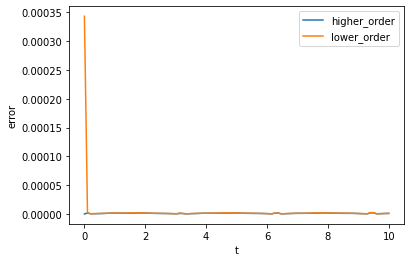

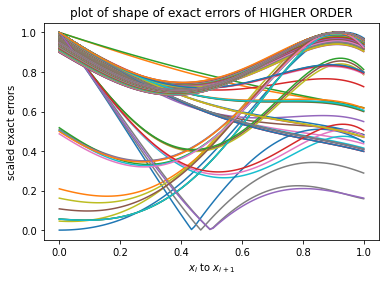

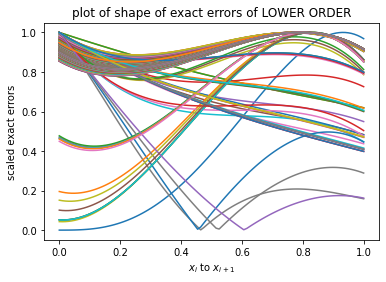

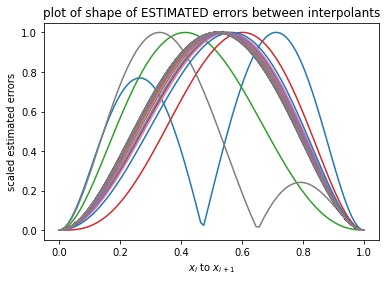

0.0
0.0
2.618724448074164e-05
1.621420218453698e-05
1.0034807923602063e-05
7.281778389305743e-06
3.998263471811925e-06
1.9322238283478455e-06
8.438078807279648e-07
1.3383430835789412e-07
2.6853695609535544e-06
1.1149918573982731e-06
5.372048927643203e-07
3.3115235287262124e-07
2.643124380752315e-07
2.4959893427101143e-07
2.543941279298245e-07
2.6648030038156634e-07
2.8128027992901927e-07
2.9707862439498633e-07
3.13231762694155e-07
3.294976066992028e-07
3.457844533205634e-07
3.6205693226820657e-07
3.783007767876878e-07
3.945096277435667e-07
4.1068009054567867e-07
4.2680988371346373e-07
4.428971454029096e-07
4.589401735866083e-07
4.749373291312864e-07
4.908869991604448e-07
5.067875837871938e-07
5.226374911182496e-07
5.38435135699622e-07
5.541789372953687e-07
5.698673215537298e-07
5.854987195075267e-07
6.010715681847856e-07
6.165843101091362e-07
6.320353941324797e-07
6.474232751574327e-07
6.627464144148831e-07
6.780032795750124e-07
6.931923450248512e-07
7.083120917572572e-07
7.23361007759

In [7]:
t_span_4 = [0, 10]
y0_4 = [0]

def model4(t, y):
    return [100 * (sin(t) - y)]
    # return [10 * (sin(t) - y)]

def solution4(t):
    return [( 100 * ( exp(-100 * x) - cos(x) ) +  10000 * sin(x) ) / 10001 for x in t]
    # return [( 10 * ( exp(-10 * x) - cos(x) ) +  100 * sin(x) ) / 101 for x in t]

experiment(model4, y0_4, t_span_4, solution4)

tolerance= 1e-06
alpha values [0.49999999999999983, 1.0, 0.9999999999999997, 1.0000000000000002, 0.5000000000000002, 0.5, 1.0000000000000007, 0.9999999999999987, 1.9999999999999973, 2.0, 2.0000000000000444, 1.9999999999996447, 0.4999999999999556, 1.000000000000011, 1.0000000000000222, 0.5000000000000028, 0.5000000000000888, 0.4999999999999889, 0.9999999999999889, 0.9999999999999944, 0.9999999999998224]
n_steps 1115
n_successful_steps 912

integration complete
ERROR: 0 is outside of the solution range: 0.01 <= x <= 10.004999999999873 - evaluating the first interp
ERROR: 0 is outside of the solution range: 0.01 <= x <= 10.004999999999873 - evaluating the first interp


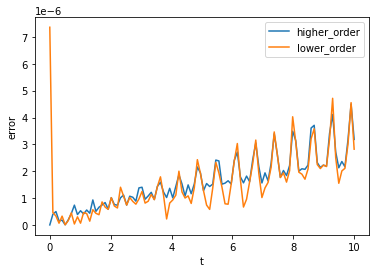

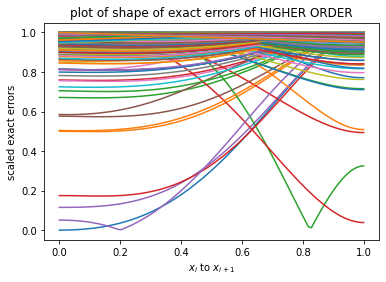

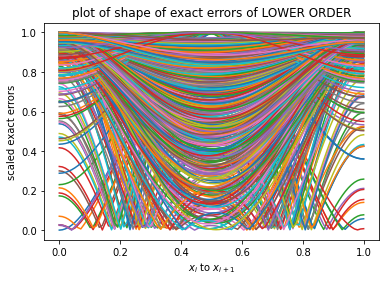

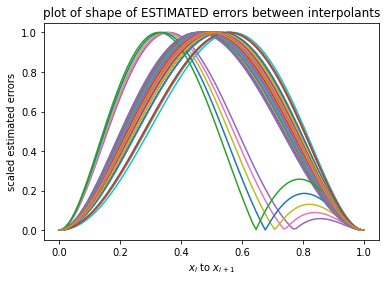

0.0
0.0
6.161256393966141e-09
1.2316338615647737e-08
1.8347519503691956e-08
2.4153532063309058e-08
2.0975831427350045e-07
3.636334700019006e-07
4.80831987559327e-07
5.582922084634845e-07
5.942917540302517e-07
5.881249194317206e-07
5.399588025589708e-07
4.5084234923109534e-07
3.228713665315297e-07
1.5954296372910903e-07
1.5703784006504407e-07
1.5458343138874397e-07
1.5229224281654297e-07
1.502982969192601e-07
1.487592187210396e-07
1.4785667978856054e-07
1.4779308776802225e-07
1.487806255973112e-07
1.510156466544288e-07
1.546264025709121e-07
1.5957433463498205e-07
1.6547898984420328e-07
1.7132772400785257e-07
1.7503768257043362e-07
1.728961174229937e-07
1.590909766147064e-07
1.2595096765544156e-07
6.608987579426184e-08
2.2267097055106433e-08
1.2756935885427367e-07
1.3237565243962024e-07
1.362900174939341e-07
1.3897751771629885e-07
1.4018068550392115e-07
1.3976962764949974e-07
1.377694929249884e-07
1.343561313316144e-07
1.2982127639560304e-07
1.2451847641870017e-07
4.764536765122784e-09
9

In [8]:
t_span_5 = [0, 10]
y0_5 = [2]

def model5(t, y):
    return [(15 * cos(10 * t))/y]

def solution5(t):
    return [sqrt(3*sin(10*x) + 4) for x in t]

experiment(model5, y0_5, t_span_5, solution5)

tolerance= 1e-06
alpha values [0.5, 1.0, 0.49999999999999983, 1.0000000000000002, 0.9999999999999997, 0.5000000000000002, 1.0000000000000007, 0.49999999999999967, 0.9999999999999987, 0.5000000000000007]
n_steps 43
n_successful_steps 41

integration complete
ERROR: 0 is outside of the solution range: 0.01 <= x <= 10.799999999999999 - evaluating the first interp
ERROR: 0 is outside of the solution range: 0.01 <= x <= 10.799999999999999 - evaluating the first interp


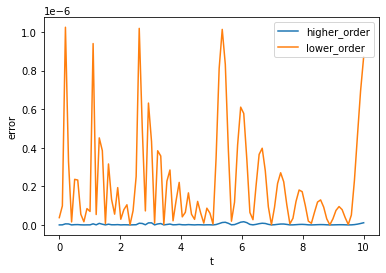

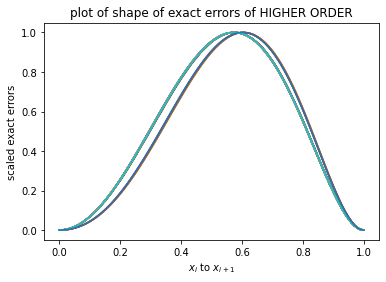

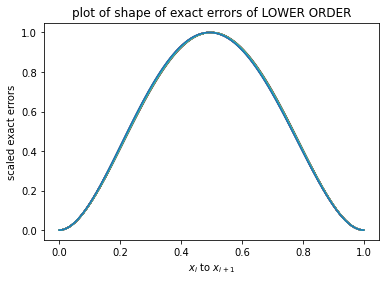

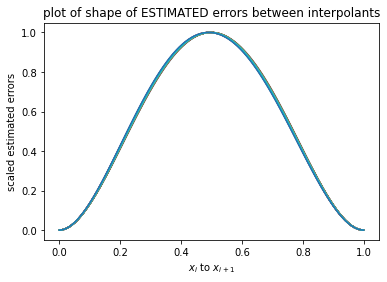

0.0
0.0
0.0
0.0
0.0
0.0
1.1102230246251565e-16
1.1102230246251565e-16
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
5.551115123125783e-17
0.0
5.551115123125783e-17
5.551115123125783e-17
0.0
5.551115123125783e-17
5.551115123125783e-17
5.551115123125783e-17
5.551115123125783e-17
0.0
0.0
2.7755575615628914e-17
0.0
2.7755575615628914e-17
0.0
2.7755575615628914e-17
2.7755575615628914e-17
2.7755575615628914e-17
2.7755575615628914e-17
2.7755575615628914e-17
2.7755575615628914e-17
1.3877787807814457e-17
2.7755575615628914e-17
2.7755575615628914e-17
2.7755575615628914e-17
1.3877787807814457e-17


In [9]:
t_span_6 = [0, 10]
y0_6 = [1]

def model6(t, y):
    return [-y/(t+1)]

def solution6(t):
    return [1/(x+1) for x in t]

experiment(model6, y0_6, t_span_6, solution6)

tolerance= 1e-06
alpha values [0.5, 1.0, 0.49999999999999983, 1.0000000000000002, 0.9999999999999997, 0.5000000000000002, 1.0000000000000007, 0.49999999999999967, 0.9999999999999987, 1.9999999999999973, 1.0000000000000029, 0.9999999999999944, 1.0000000000000056, 0.9999999999999972]
n_steps 97
n_successful_steps 75

integration complete
ERROR: 0 is outside of the solution range: 0.01 <= x <= 10.080000000000005 - evaluating the first interp
ERROR: 0 is outside of the solution range: 0.01 <= x <= 10.080000000000005 - evaluating the first interp


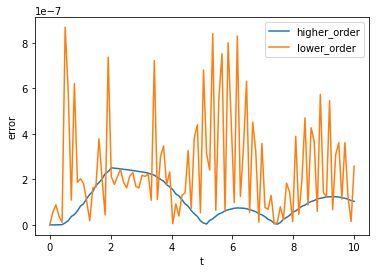

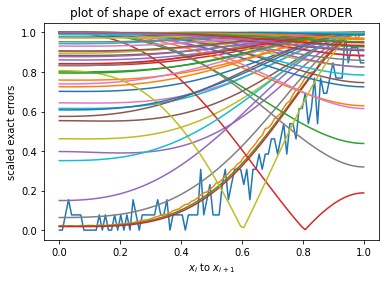

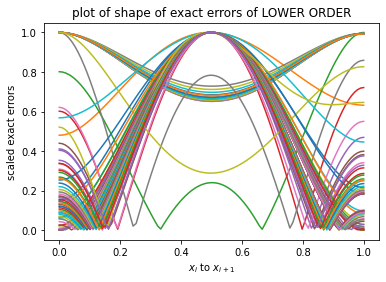

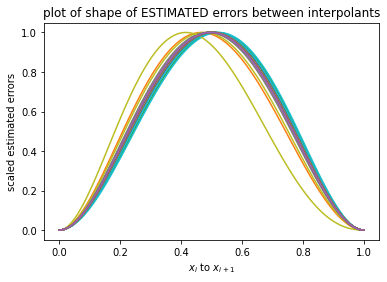

0.0
0.0
1.2212453270876722e-15
5.6066262743570405e-14
2.8617108682738035e-12
1.5854584312080533e-10
3.988019914302754e-10
7.200464668954965e-10
1.1182385017960428e-09
1.755063894215425e-08
3.797217362766503e-08
6.166006338848007e-08
8.783260085909461e-08
1.1567083474384177e-07
1.4434051867628916e-07
1.7301375679346087e-07
2.0088980659527245e-07
2.2721453749041665e-07
2.512980935565068e-07
2.5010814719284014e-07
2.488843370840321e-07
2.4762269185130137e-07
2.4631964457011435e-07
2.4497204709206244e-07
2.4357718442225007e-07
2.42132783268012e-07
2.406370194218965e-07
2.3908852109233436e-07
2.3748637034692877e-07
2.358301007809871e-07
2.341196921884503e-07
2.3235556367851018e-07
2.3053856246235682e-07
2.2866995197379225e-07
2.2094415719209337e-07
2.094448419143191e-07
1.945575458517368e-07
1.7674209529250362e-07
1.5651858126242146e-07
1.344522503887724e-07
1.111377220253118e-07
8.718296010123971e-08
6.31934086586794e-08
3.9756692528369886e-08
1.7428251536388828e-08
3.281755256434593e-09
2

In [10]:
t_span_7 = [0, 10]
y0_7 = [1]

def model7(t, y):
    alpha = 0.1
    return [ -alpha*y - exp(-alpha*t)*sin(t)]

def solution7(t):
    alpha = 0.1
    return [exp(-alpha*x)*cos(x) for x in t]

experiment(model7, y0_7, t_span_7, solution7)

tolerance= 1e-06
alpha values [0.5, 1.0, 0.49999999999999983, 1.0000000000000002, 0.9999999999999997, 0.5000000000000002, 1.0000000000000007, 0.9999999999999987, 0.5000000000000007, 0.49999999999999967, 1.9999999999999973]
n_steps 50
n_successful_steps 44

integration complete
ERROR: 0 is outside of the solution range: 0.01 <= x <= 11.119999999999997 - evaluating the first interp
ERROR: 0 is outside of the solution range: 0.01 <= x <= 11.119999999999997 - evaluating the first interp


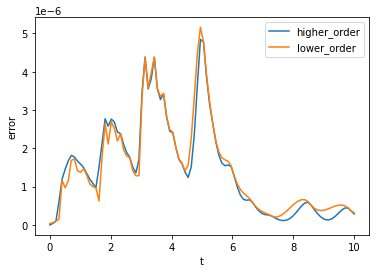

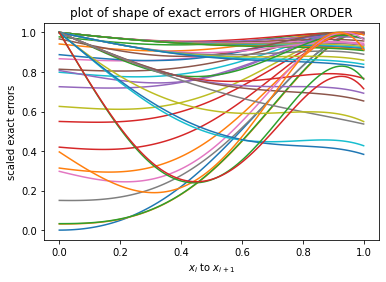

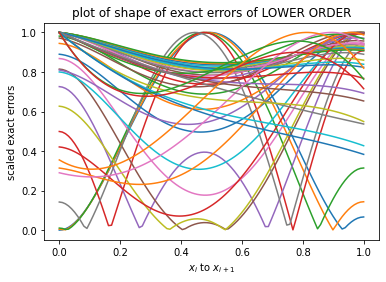

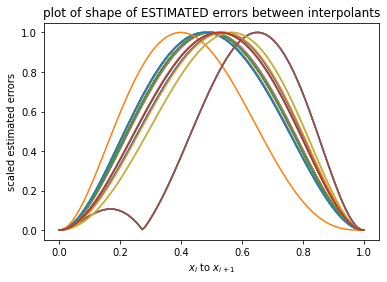

0.0
0.0
3.2564728691397704e-11
1.049336506575571e-09
3.2062330901361236e-08
5.830033888987174e-08
8.0314276229565e-08
9.859857141858441e-08
1.1359659513043852e-07
7.550576974768575e-07
1.204347956473839e-06
1.5042713191748547e-06
1.6891752210312916e-06
1.7865155227947405e-06
1.8181435485487007e-06
1.8013631897795257e-06
1.7497979351577264e-06
1.6741009218890213e-06
1.5825354754417376e-06
1.4814489127656927e-06
1.375658480851083e-06
1.2687650552400953e-06
1.163407523874227e-06
1.061468537844057e-06
9.642404499299317e-07
2.286906671034039e-06
2.8128755756862134e-06
2.8792957953438503e-06
2.6984099612548107e-06
2.40068085421985e-06
2.0636647602989555e-06
1.7312040325734301e-06
1.4260756631134797e-06
4.4852530438621585e-06
4.336591993503447e-06
3.3278284230497945e-06
2.3045837633794974e-06
1.5055626405580114e-06
4.879008356883929e-06
2.6189014477040473e-06
1.4384011159940258e-06
6.140853594516216e-07
2.3531160575629428e-07
5.4285413675359e-07
4.1456387744887024e-07
2.966550534111434e-07


In [11]:
t_span_11 = [0, 10]
y0_11 = [1]

def model11(t, y):
    return [-2*y + t]

def solution11(t):
    return [1/4 * (-1 + 5 * exp(-2 * x) + 2 * x) for x in t]

experiment(model11, y0_11, t_span_11, solution11)

In [12]:
# THE PROBLEMS BELOW CANNOT BE DONE YET
# CANNOT BE DONE AS MY CURRENT rk6 does not handle a vector for the ys
### ======================================================================


# Jeff cash test set first one

# t_span_8 = [0, 10]
# eps = 0.1
# a = exp(-1/eps)
# y0_8 = [1, a/(eps*(-1+a))]

# def model8(t, y):
#     return [y[1], y[0]/eps]

# def solution8(t):
#     # THE experiment method calculates error on "computed[0]"
#     # so we can only verify the error of y[0] there
#     return [(1-exp(x/eps)*a)/(1-a) for x in t]

# experiment(model8, y0_8, t_span_8, solution8)

# ## the results were extremely bad. So i wanted to see the solution
# plt.figure()
# plt.plot(t_span_8, solution8(t_span_8))



In [13]:
# Jeff cash test set second one
# t_span_9 = [0, 10]
# eps = 0.1
# y0_9 = [1, -1/sqrt(eps)]

# def model9(t, y):
#     return [y[1], (y[0] + y[0]**2 - exp(-2*t/sqrt(eps)))/eps]

# def solution9(t):
#     # THE experiment method calculates error on "computed[0]"
#     # so we can only verify the error of y[0] there
#     return [exp(-x/sqrt(eps)) for x in t]

# experiment(model9, y0_9, t_span_9, solution9)

In [14]:
# Wolfram Alpha first problem

# t_span_10 = [0, 10]
# y0_10 = [1, 2]

# def model10(t, y):
#     return [y[1], -3*y[0] + 2*cos(4*t)]

# def solution10(t):
#     # THE experiment method calculates error on "computed[0]"
#     # so we can only verify the error of y[0] there
#     s = sqrt(3)
#     return [(26*s*sin(s*x) - 6*cos(4*x) + 45*cos(s*x))/39 for x in t]

# experiment(model10, y0_10, t_span_10, solution10)